# Multiple Regression Analysis: Baseball Analytics & HR Analytics

- The goal of regression model is to **minimize Sum of Squared Error (SSE)**

                             minimize SSE
 
- **The model with multiple X variables is likely to reduce SSE. This makes multiple regression more powerful than single variable regression (or univariate regression)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

In [2]:
teams = pd.read_csv("data/baseball.csv")
teams.head()

,yearID,teamID,Rank,R,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
0,2000,CHA,1,978,839,162,95,1615,591,53,5646,61,216,325,33,31133500,0.286043,0.355692,0.470067
1,2000,CLE,2,950,816,162,90,1639,685,51,5683,52,221,310,30,75880771,0.288404,0.367022,0.470174
2,2000,DET,3,823,827,162,79,1553,562,43,5644,49,177,307,41,58265167,0.275159,0.342648,0.438164
3,2000,KCA,4,879,930,162,77,1644,511,48,5709,70,150,281,27,23433000,0.287966,0.347586,0.425469
4,2000,MIN,5,748,880,162,69,1516,556,35,5615,51,116,325,49,16519500,0.269991,0.336743,0.407302


On Base Percentage (OBP, On Base Average, OBA) is a measure of how often a batter reaches base. 

The full formula is OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies). Batters are not credited with reaching base on an error or fielder's choice, and they are not charged with an opportunity if they make a sacrifice bunt.

All Time Leaders
Ted Williams	.482	(career)
Barry Bonds	    .609	(2004 season)

http://www.baseball-reference.com/bullpen/On_base_percentage

In [3]:
# correlation 


In [4]:
# correlation heatmap


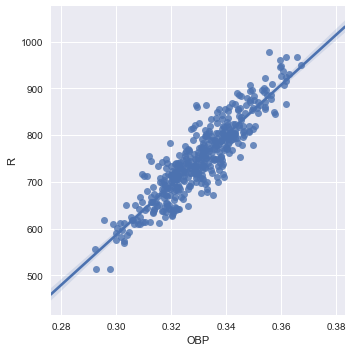

In [5]:
sns.lmplot('OBP', 'R', teams)

In [6]:
# lmplot for SLF and R



# Model Development
- We use **scikit**, the python package for statistical analysis and data mining (predictive analytics)

In [7]:
teams = teams.drop(['yearID', 'teamID', 'Rank'], axis=1)
teams.head(2)

,R,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
0,978,839,162,95,1615,591,53,5646,61,216,325,33,31133500,0.286043,0.355692,0.470067
1,950,816,162,90,1639,685,51,5683,52,221,310,30,75880771,0.288404,0.367022,0.470174


In [8]:
#assigning columns to X and Y variables
y = teams['R'] 
X = teams.drop(['R'], axis =1)
# X contains (too) many independent variables or predictors ... we will see how it goes

In [9]:
y.head(2)

0    978
1    950
Name: R, dtype: int64

In [10]:
X.head(2)

,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary,BA,OBP,SLG
0,839,162,95,1615,591,53,5646,61,216,325,33,31133500,0.286043,0.355692,0.470067
1,816,162,90,1639,685,51,5683,52,221,310,30,75880771,0.288404,0.367022,0.470174


In [11]:
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [12]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [  2.14557581e-01   2.83197746e-01   2.13712608e+00   4.35374346e+00
   4.96998166e-01   5.69565514e-01  -9.04191260e-01   4.13313528e-01
  -3.16197606e+00  -1.11752068e+00  -1.95843536e+00  -2.36373413e-08
  -2.66509695e+04  -2.37182482e+03   7.19139370e+03]
y-intercept  4429.11048328


In [13]:
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,RA,2.145576e-01
1,G,2.831977e-01
2,W,2.137126e+00
3,H,4.353743e+00
4,BB,4.969982e-01
5,HBP,5.695655e-01
6,AB,-9.041913e-01
7,SF,4.133135e-01
8,HR,-3.161976e+00
9,2B,-1.117521e+00


In [ ]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

In [ ]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

This full model seems better than a model (univariate regression model) with one X variable, but would be too complex to be practical in sports management (hiring baseball players)

In [ ]:
# Choose a smaller set of multiple variables as X (e.g., OBP, SLG) and develop a multiple linear regression model (model2).

y = teams['R'] 
X = teams[['OBP', 'SLG']]

model2 = lm.LinearRegression()
model2.fit(X, y)   
model2_y = model2.predict(X)

In [ ]:
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

# Model Evaluation

In [ ]:
print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

In [ ]:
# Choose three variables (BA, OBP, SLG) and develop a multiple linear regression model (model3).






# Multiple Regression using Statsmodels

In [ ]:
# without two columns: 2B, 3B (Python does not like the variables starting with number)
runs_reg_model = sm.ols("R~RA+G+W+H+BB+HBP+AB+SF+HR+salary+BA+OBP+SLG",teams)
runs_reg = runs_reg_model.fit()
print runs_reg.summary()

In [ ]:
# Choose a smaller set of multiple variables as X (e.g., OBP, SLG, BA) and develop a multiple linear regression model with statsmodel.





# Appendix : With fewer independent variables

### Recruting strategy based on Bill Beane's Formula: Bill's "Hiring" Strategy

Based on the analysis above, a good strategy for recruiting batters would focus on targeting **undervalued players with high OBP and SLG**. In the late 1990s, **the old school scouts overvalued BA, and players with high BA had high salaries**. Although BA and OBP have a positive correlation, **there were some players that have high OBP and SLG, and relatively small BA**. These players were undervalued by the market, and were the target of Billy Beane.

In [ ]:
#First Model
runs_reg_model1 = sm.ols("R~OBP+SLG+BA",teams)
runs_reg1 = runs_reg_model1.fit()
#Second Model
runs_reg_model2 = sm.ols("R~OBP+SLG",teams)
runs_reg2 = runs_reg_model2.fit()
#Third Model
runs_reg_model3 = sm.ols("R~BA",teams)
runs_reg3 = runs_reg_model3.fit()

- The first one will have as features OBP, SLG and BA. 
- The second model will have as features OBP and SLG. 
- The last one will have as feature BA only.

In [ ]:
print runs_reg1.summary()
print runs_reg2.summary()
print runs_reg3.summary()

- The first model has an Adjusted R-squared of 0.918, with 95% confidence interval of BA between -283 and 468. This is counterintuitive, since we expect the BA value to be positive. This is due to a **multicollinearity** between the variables.

- The second model has an Adjusted R-squared of 0.919, and the last model an Adjusted R-squared of 0.500.

- Based on this analysis, we could confirm that the second model using **OBP** and **SLG** is the best model for predicting Run Scored.

# Multicollinearity
- The **X variables (or predictors) are highly correlated**. This causes the coefficient estimates (e.g., BA, OBP) to be **unstable** 
- Thus, the regression model should be **as simple as possible** (having a fewer number of variables) ... **simplicity** is important, but **not too simple either**
- You may consider advanced regression techniques such as **lasso** to deal with multicollinearity. lasso removes highly correlated variables from the model. This is called **"feature selection** in regression. This type of regression helps develop **simple or parsimonious models**.

In [ ]:
# high values indicate multicollinearity
print np.linalg.cond(runs_reg1.model.exog)
print np.linalg.cond(runs_reg2.model.exog)
print np.linalg.cond(runs_reg3.model.exog)
print np.linalg.cond(runs_reg.model.exog)

# Modely Deployment : Predictive Analytics (Predicting Y value)
- **Scoring dataset** (e.g., baseball_scoringdataset.csv) refers to a dataset without y value. This type of dataset usually refers to the data from **"the future"**
- On the other hand 'baseball.csv' is called **training dataset** because the model is built on that dataset.
- This could be tomorrow's stock price, the next quarter's employment rate or oil price, the next season's team performance, etc. 
- Your model is used to predict y value for this dataset

In [ ]:
# loading the scoring datset
scoring = pd.read_csv("data/baseball_scoringdataset.csv")
# We use model2 to predict y value. model2 considered only two X variables (OBP, SLG)
columns = scoring[['OBP', 'SLG']]
model2.predict(columns)

In [ ]:
# use model3 to predict y value for the scoring dataset.




# References

- http://adilmoujahid.com/posts/2014/07/baseball-analytics/ (reproduced from this page)